<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/Assignment1_Part2_Space_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Part 2

Choose one data set from the machine learning repositories, perform data visualization, and indicate which algorithm will work best for this data set.

### Data visualization with dataset: Deep_Space

Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load data and inspect the first rows

In [2]:
df = pd.read_csv ('DeepSpaceData.csv')
df.head()

,X1,X2
0,1.695171,-5.435603
1,0.453368,-5.470454
2,0.877307,-5.652625
3,0.602698,-5.217887
4,-0.138937,-7.198564


Show summary statistics

In [3]:
df.describe()

,X1,X2
count,520.000000,520.000000
mean,3.945839,2.408448
std,5.170278,4.840586
min,-7.543474,-8.929049
25%,0.343985,-0.729507
50%,5.030117,3.149885
75%,8.162500,5.497722
max,13.640280,12.702631


Data visualization

Visual inspection to see which cluster would fit the data better

We can see that there are about 4 to 6 clusters formed naturally, with some outlier data in between clusters

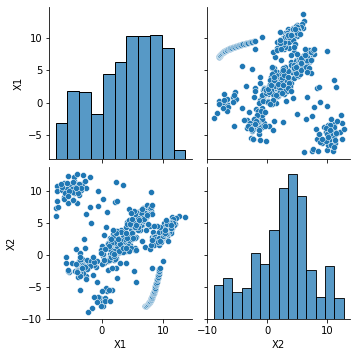

In [6]:
#Plot both scatter Plots and histohram with "pairplot"
sns.pairplot(df, palette="husl",diag_kind="hist")

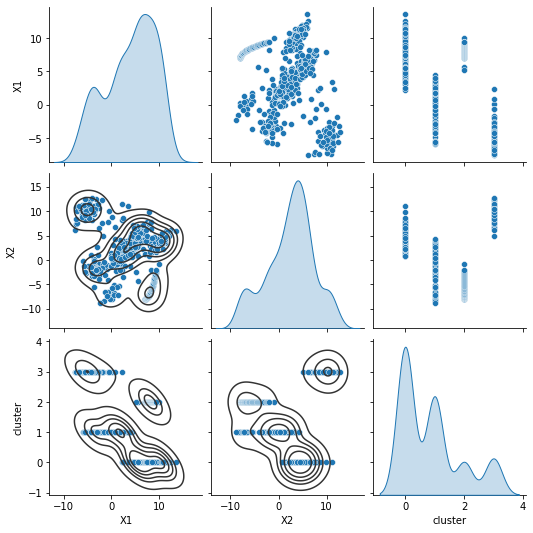

In [13]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=6, color=".2")

### Clustering Algorithms

##### K-Means

In [11]:
from sklearn.cluster import KMeans

# Instantiate object
nClusters = 4  #we have to arbitrarily select the number of desired clusters.
km = KMeans(n_clusters = nClusters)
km.fit_predict

# Create centers
y_predict = km.fit_predict(df[['X1', 'X2']])
df['cluster'] = y_predict

# Instantiate the four clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

Text(0.5, 1.0, 'K-Means of Deep Space Data')

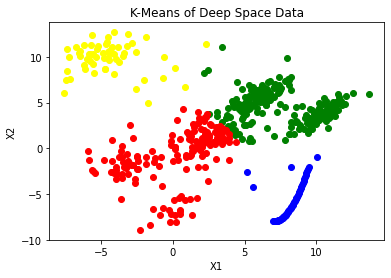

In [12]:
# Plot clusters in scatterplot
plt.scatter(df1.X1, df1['X2'], color = 'green') 
plt.scatter(df2.X1, df2['X2'], color = 'red')
plt.scatter(df3.X1, df3['X2'], color = 'blue') 
plt.scatter(df4.X1, df4['X2'], color = 'yellow')

#Labeling scatter plot
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-Means of Deep Space Data')

From the above we can see that 4 clusters were not enough. We will try 6 clusters

Text(0.5, 1.0, 'K-Means of Deep Space Data')

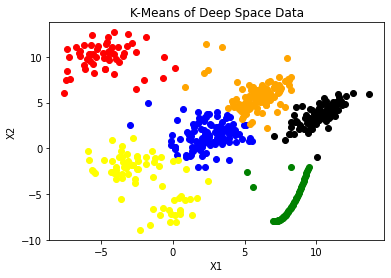

In [16]:
nClusters = 6 #we have to arbitrarily select the number of desired clusters.
km = KMeans(n_clusters = nClusters)
km.fit_predict

# Create centers
y_predict = km.fit_predict(df[['X1', 'X2']])
df['cluster'] = y_predict

# Instantiate the 6 clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]

# Plot clusters in scatterplot
plt.scatter(df1.X1, df1['X2'], color = 'green') 
plt.scatter(df2.X1, df2['X2'], color = 'red')
plt.scatter(df3.X1, df3['X2'], color = 'blue') 
plt.scatter(df4.X1, df4['X2'], color = 'yellow')
plt.scatter(df5.X1, df5['X2'], color = 'orange')
plt.scatter(df6.X1, df6['X2'], color = 'black')

#Labeling scatter plot
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-Means of Deep Space Data')

The yellow points seem to be forming 2 different clusters. We will try with 7 clusters

Text(0.5, 1.0, 'K-Means of Deep Space Data')

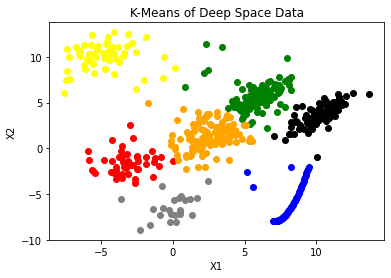

In [18]:
nClusters = 7 #we have to arbitrarily select the number of desired clusters.
km = KMeans(n_clusters = nClusters)
km.fit_predict

# Create centers
y_predict = km.fit_predict(df[['X1', 'X2']])
df['cluster'] = y_predict

# Instantiate the 6 clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
df7 = df[df.cluster==6]

# Plot clusters in scatterplot
plt.scatter(df1.X1, df1['X2'], color = 'green') 
plt.scatter(df2.X1, df2['X2'], color = 'red')
plt.scatter(df3.X1, df3['X2'], color = 'blue') 
plt.scatter(df4.X1, df4['X2'], color = 'yellow')
plt.scatter(df5.X1, df5['X2'], color = 'orange')
plt.scatter(df6.X1, df6['X2'], color = 'black')
plt.scatter(df7.X1, df7['X2'], color = 'grey')

#Labeling scatter plot
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-Means of Deep Space Data')

### DBSCAN

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


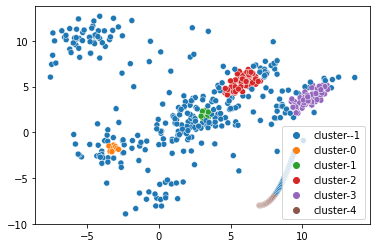

In [20]:
from sklearn.cluster import DBSCAN

data = df.values

#Hyperparameters
epsilon = 0.5
minSamples = 10
db = DBSCAN(eps=epsilon, min_samples=minSamples).fit(data)

labels = db.labels_
sns.scatterplot(data[:,0], data[:,1], hue=["cluster-{}".format(x) for x in labels])



### Sensitivity analysis (i.e. ablation study) of the epsilon value

As expected, the bigger the value of epsilon, the less number of clusters we have.

In sklearn, the noise data is labeled as "cluster -1" and "cluster --1". We can see that if the epsilon is too smalll, we have too many outliers.



0.5
1.0
1.5
2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

3
5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


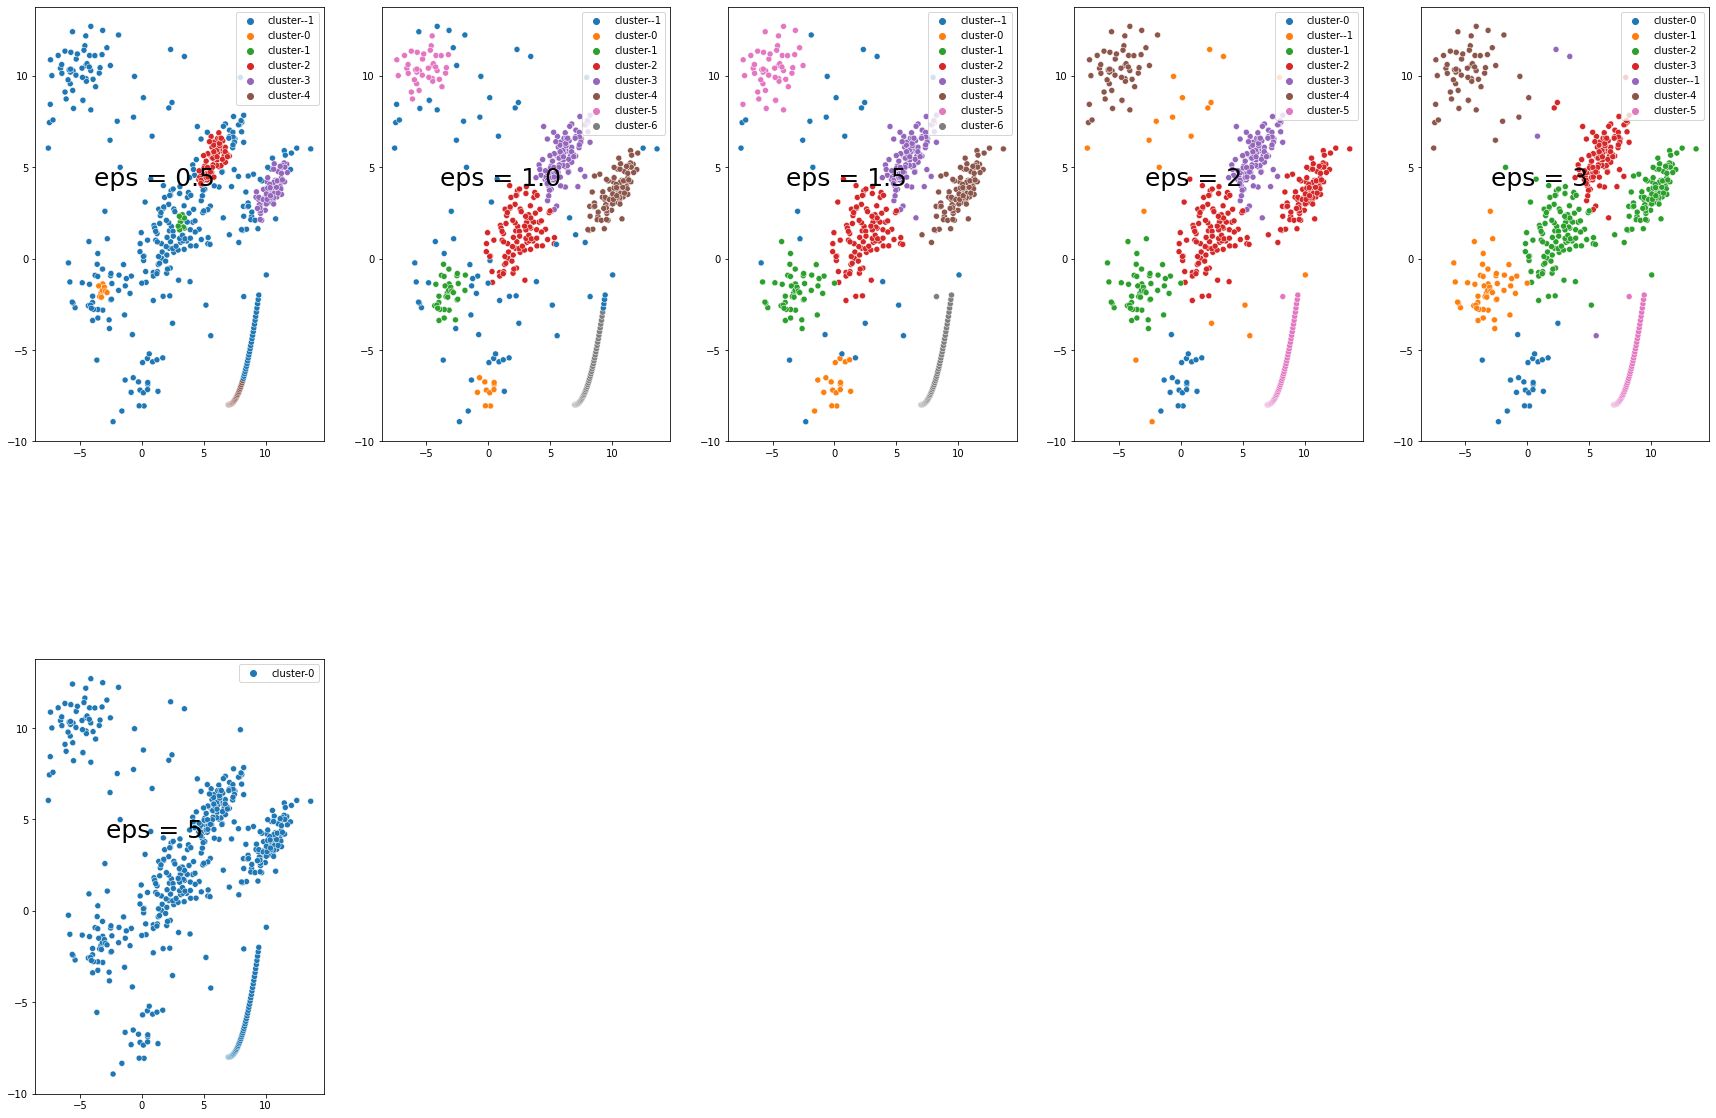

In [21]:

fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in [0.5,1.0,1.5,2,3,5]:
    eps = x
    db = DBSCAN(eps=eps, min_samples=minSamples).fit(data)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    print(eps)
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 1)), fontsize=25, ha="center")
    sns.scatterplot(data[:,0], data[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1